In [36]:
# Dependencies

# Standard Dependencies
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Read in csv of Toy Dataset
# We will use this dataset throughout the tutorial
df = pd.read_csv('toy_dataset.csv')
df.head()


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


# Basic Exploratory Data Analysis and Data Cleaning

## Check shape 

In [2]:
df.shape

(150000, 6)

## Check if missing values (null) are present 

In [3]:
df.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

## Check for basic information of our dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


## Check if NA values are present in dataframe

In [5]:
print(df.isna())

        Number   City  Gender    Age  Income  Illness
0        False  False   False  False   False    False
1        False  False   False  False   False    False
2        False  False   False  False   False    False
3        False  False   False  False   False    False
4        False  False   False  False   False    False
...        ...    ...     ...    ...     ...      ...
149995   False  False   False  False   False    False
149996   False  False   False  False   False    False
149997   False  False   False  False   False    False
149998   False  False   False  False   False    False
149999   False  False   False  False   False    False

[150000 rows x 6 columns]


## Removing trailing and ending spaces if present


In [6]:
# We can remove any ussless whitespaces if present for example:
df['City'].str.strip()
df['Gender'].str.strip()
df['Illness'].str.strip()

0         No
1         No
2         No
3         No
4         No
          ..
149995    No
149996    No
149997    No
149998    No
149999    No
Name: Illness, Length: 150000, dtype: object

## Check for duplicates in dataframe

In [7]:
duplicate_rows = df.duplicated()
print(duplicate_rows)
# No duplicates found to remove then we would do: df.drop_duplicates(inplace=True)

0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997    False
149998    False
149999    False
Length: 150000, dtype: bool


## Check if there is no negative Age and Income values in dataframe

In [8]:
negative_ages = (df['Age'] < 0).any()

if negative_ages:
    print("There are negative ages in the 'Age' column.")
else:
    print("There are no negative ages in the 'Age' column.")

There are no negative ages in the 'Age' column.


In [9]:
negative_incomes = (df['Income'] < 0).any()

if negative_ages:
    print("There are negative incomes in the 'Income' column.")
else:
    print("There are no negative incomes in the 'Income' column.")

There are no negative incomes in the 'Income' column.


## Check now basic statistic data of our dataframe

In [10]:
# Basic data description
df.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


In [11]:
# Confirming via Numpy
mean_income_numpy = np.mean(df['Income'])
mean_age_numpy = np.mean(df['Age'])

print("Mean Income using NumPy {:.3f}".format(mean_income_numpy))
print("Mean Age using NumPy {:.3f}".format(mean_age_numpy))

Mean Income using NumPy 91252.798
Mean Age using NumPy 44.950


## Checking distributions

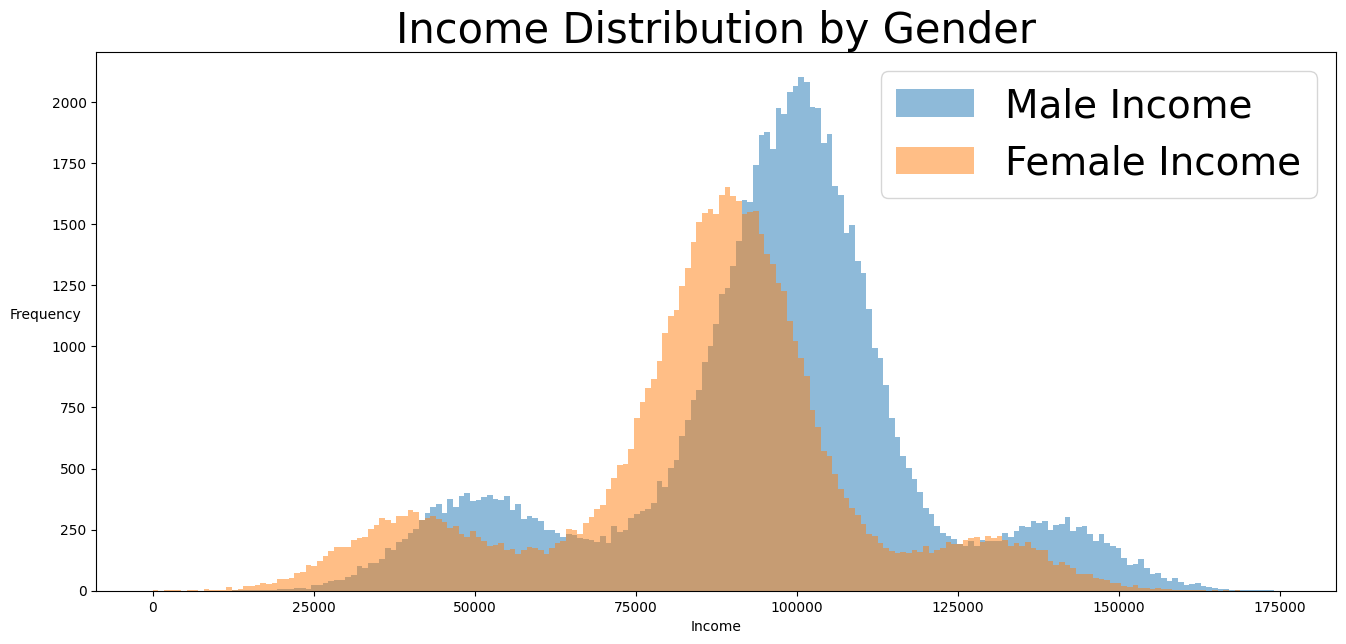

In [12]:
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

x = pd.Series(male_df['Income'])
y = pd.Series(female_df['Income'])

plt.figure(figsize=(16,7))

bins = np.linspace(0, 175000, 200)

plt.hist(x, bins, alpha=0.5, label='Male Income')
plt.hist(y, bins, alpha=0.5, label='Female Income')
plt.legend(loc='upper right', prop={'size' : 28})
plt.xlabel('Income')
plt.ylabel('Frequency', rotation=0)
plt.rc('axes', labelsize=10) 
plt.rc('axes', titlesize=30) 
plt.title('Income Distribution by Gender')


plt.show()

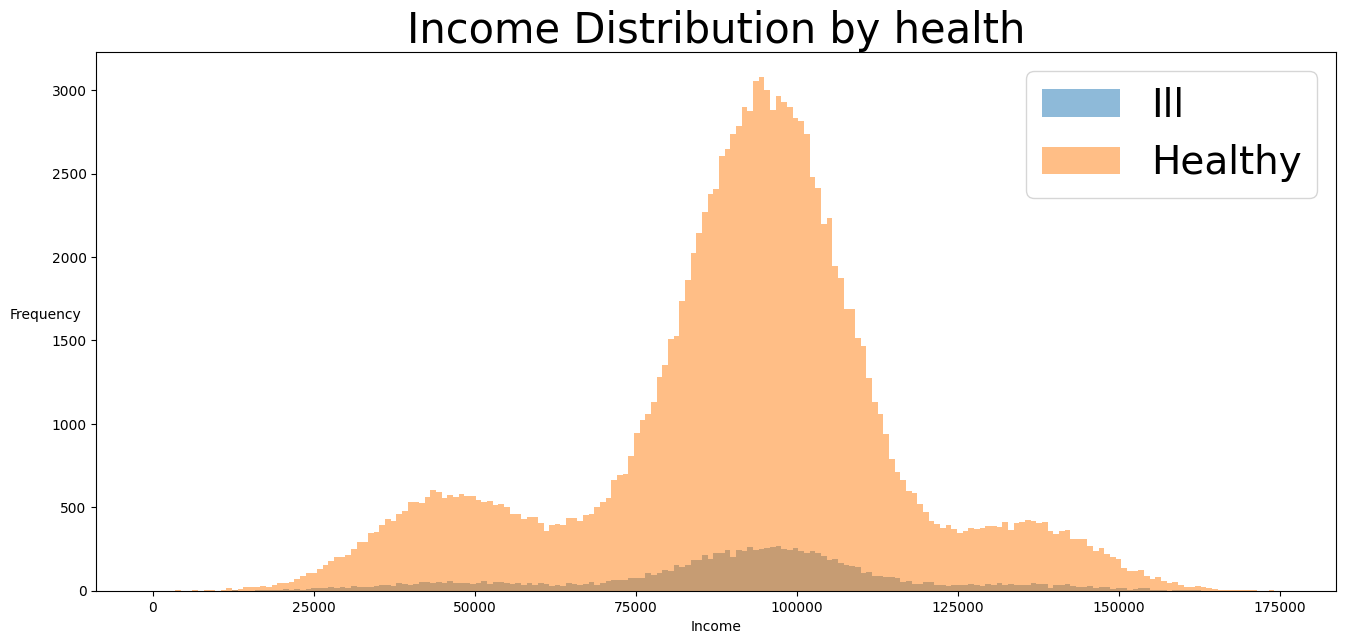

In [13]:
# EDA - healthy vs. ill income distribution
ill = df[df['Illness'] == 'Yes']
healthy = df[df['Illness'] == 'No']

x = pd.Series(ill['Income'])
y = pd.Series(healthy['Income'])

plt.figure(figsize=(16,7))

bins = np.linspace(0, 175000, 200)

plt.hist(x, bins, alpha=0.5, label='Ill')
plt.hist(y, bins, alpha=0.5, label='Healthy')
plt.legend(loc='upper right', prop={'size' : 28})
plt.xlabel('Income')
plt.ylabel('Frequency', rotation=0)
plt.rc('axes', labelsize=10) 
plt.rc('axes', titlesize=30) 
plt.title('Income Distribution by health')


plt.show()

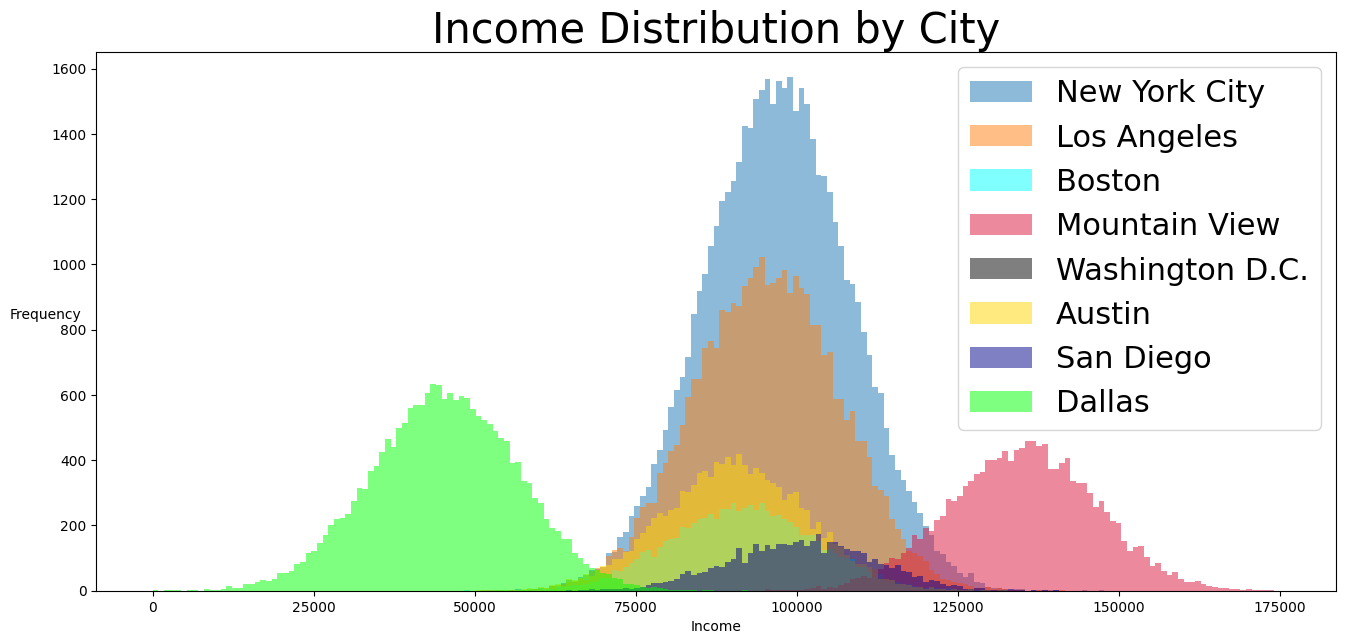

In [14]:
new_df = df[df['City'] == 'New York City']
los_df = df[df['City'] == 'Los Angeles']
bos_df = df[df['City'] == 'Boston']
moun_df = df[df['City'] == 'Mountain View']
wash_df = df[df['City'] == 'Washington']
aus_df = df[df['City'] == 'Austin']
san_df = df[df['City'] == 'San Diego']
dal_df = df[df['City'] == 'Dallas']

a = pd.Series(new_df['Income'])
b = pd.Series(los_df['Income'])
c = pd.Series(bos_df['Income'])
d = pd.Series(moun_df['Income'])
e = pd.Series(wash_df['Income'])
f = pd.Series(aus_df['Income'])
g = pd.Series(san_df['Income'])
h = pd.Series(dal_df['Income'])

plt.figure(figsize=(16,7))

bins = np.linspace(0, 175000, 200)

plt.hist(a, bins, alpha=0.5, label='New York City')
plt.hist(b, bins, alpha=0.5, label='Los Angeles')
plt.hist(c, bins, alpha=0.5, label='Boston', color='cyan')
plt.hist(d, bins, alpha=0.5, label='Mountain View', color='crimson')
plt.hist(e, bins, alpha=0.5, label='Washington D.C.', color='Black')
plt.hist(f, bins, alpha=0.5, label='Austin', color='Gold')
plt.hist(g, bins, alpha=0.5, label='San Diego', color='DarkBlue')
plt.hist(h, bins, alpha=0.5, label='Dallas', color='Lime')
plt.legend(loc='upper right', prop={'size' : 22})
plt.xlabel('Income')
plt.ylabel('Frequency', rotation=0)
plt.rc('axes', labelsize=10) 
plt.rc('axes', titlesize=30) 
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20) 
plt.title('Income Distribution by City')
# Save
#plt.savefig('Income_Dist_City')

plt.show()


<Axes: title={'center': 'City Counts'}, ylabel='City'>

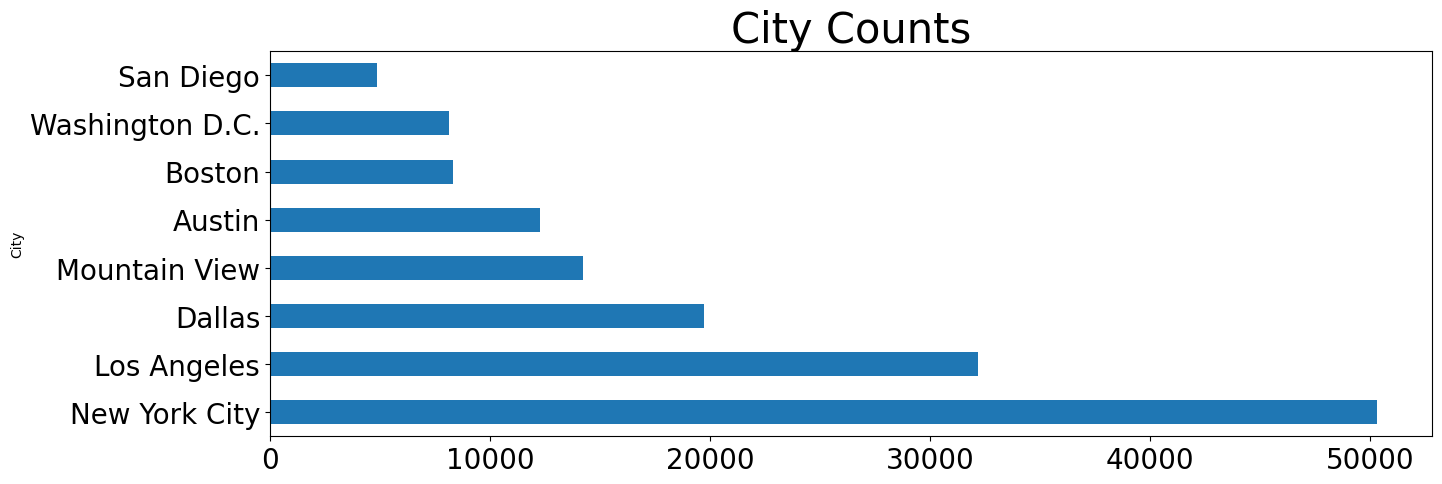

In [27]:

# Assuming df['City'].value_counts() returns the counts of each city
df['City'].value_counts().plot(kind='barh', 
                               rot=0, 
                               title='City Counts', 
                               figsize=(15,5))



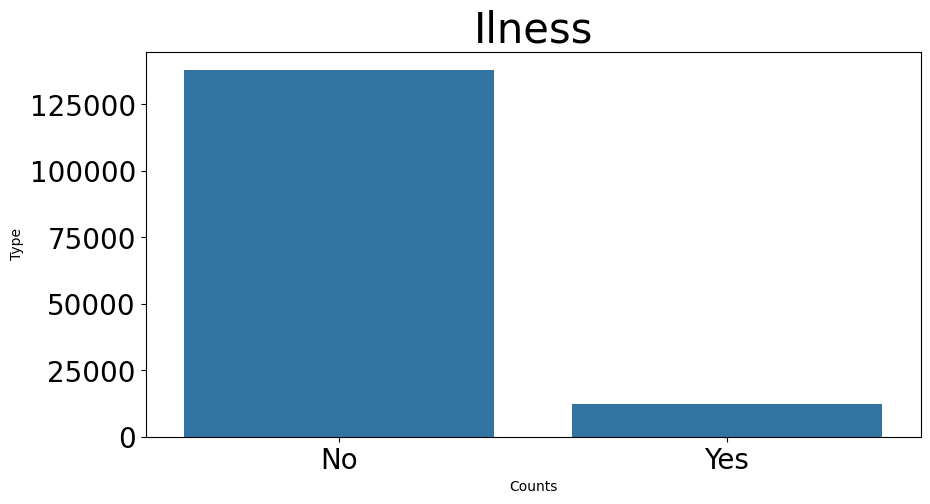

In [16]:
rcParams['figure.figsize'] = 10,5
sns.barplot(x = df['Illness'].value_counts().index, y = df['Illness'].value_counts().values)
plt.title('Ilness')
plt.xlabel('Counts')
plt.ylabel('Type')
plt.show()

## Scaling (normalizing) numerical data - it is often done in ML because during training it is easier for model to converge to global optima of our cost function

In [37]:
scaler = MinMaxScaler()
columns_to_scale = ['Age', 'Income']
scaled_values = scaler.fit_transform(df[columns_to_scale])

# Create a DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_values, columns=['scaled_age', 'scaled_income'])

# Append scaled values to the original DataFrame
df = pd.concat([df, scaled_df], axis=1)

print(df)


        Number    City  Gender  Age    Income Illness  scaled_age  \
0            1  Dallas    Male   41   40367.0      No       0.400   
1            2  Dallas    Male   54   45084.0      No       0.725   
2            3  Dallas    Male   42   52483.0      No       0.425   
3            4  Dallas    Male   40   40941.0      No       0.375   
4            5  Dallas    Male   46   50289.0      No       0.525   
...        ...     ...     ...  ...       ...     ...         ...   
149995  149996  Austin    Male   48   93669.0      No       0.575   
149996  149997  Austin    Male   25   96748.0      No       0.000   
149997  149998  Austin    Male   26  111885.0      No       0.025   
149998  149999  Austin    Male   25  111878.0      No       0.000   
149999  150000  Austin  Female   37   87251.0      No       0.300   

        scaled_income  
0            0.230700  
1            0.257228  
2            0.298840  
3            0.233928  
4            0.286501  
...               ...  
149

In [38]:
df.head()

,Number,City,Gender,Age,Income,Illness,scaled_age,scaled_income
0,1,Dallas,Male,41,40367.0,No,0.400,0.230700
1,2,Dallas,Male,54,45084.0,No,0.725,0.257228
2,3,Dallas,Male,42,52483.0,No,0.425,0.298840
3,4,Dallas,Male,40,40941.0,No,0.375,0.233928
4,5,Dallas,Male,46,50289.0,No,0.525,0.286501


In [45]:
# Hypothesis testing links
# https://www.kaggle.com/code/hamelg/python-for-data-24-hypothesis-testing 
# one hot encoding links
# https://www.kaggle.com/code/marcinrutecki/one-hot-encoding-everything-you-need-to-know
# https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/